## Verguts and Fias ## 

## Verguts & Fias model ##

In [97]:
def vector_normalization(matrix_tobe_normalized):  
    """
    Input: matrix. Rows samples. 
    Normalize each rows to have length one 
    Return: normalized matrix
    
    TODO: 
        set normalization axis, s.t. normalization can be done either for row 
        or for column vectors 
    """
    matrix_tobe_normalized =  matrix_tobe_normalized.astype(float)
    for i in range(matrix_tobe_normalized.shape[0]):
        matrix_tobe_normalized[i,:] = matrix_tobe_normalized[i,:]/np.linalg.norm(matrix_tobe_normalized[i,:])
    return matrix_tobe_normalized

In [98]:
def outputs(inputs, Weights):
    """Compute the dot product of a row input vector and a compatible Weight matrix 
    
    Args: 
        inputs (float, ndarray): 1 x input_dimension
        Weights (float, ndarray): input dimension x output_dimension
    
    Returns:
        output (float, ndarray): 1 x output dimension
    """
    output = np.dot(Weights.T, inputs)
    return output

In [99]:
import copy 
def train(inputs, Weights_, ntrials = 1000, delta = 0.1, beta = 20):
    """
    """
    # This is quite inefficient 
    Weights = copy.copy(Weights_)
    magn=np.zeros((nmagnodes,1))
    code=np.zeros((nhidnodes,1))
    respons=np.zeros((nhidnodes,1))

    for i in range(ntrials):
        random_pick = np.random.randint(0,5)
        input_vector = inputs[:,random_pick]
        y = outputs(input_vector, Weights)
        y_max =  np.max(y)
        for j in range(len(y)):
            alpha = np.exp(-beta * (y[j] - y_max)**2)/2 
            Weights[:,j] = Weights[:,j] + delta * alpha*(input_vector.T - Weights[:,j])
    return Weights

## Train the Network ##
 - Generate inputs 
 - Initialize weights 
 - Fit the Network 

**Inputs**
Modify the base function such that, input can be given in row or column form 

In [100]:
import numpy as np 
import pickle
from collections import namedtuple

Dataset = namedtuple('Dataset', ['data', 'labels'])

pickle_in = open("verguts_accumulator.pickle", "rb")
ex = pickle.load(pickle_in)
inputs = ex.data
labels = ex.labels
print(inputs)

[[1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


In [101]:
inputs = vector_normalization(inputs)
inputs
# Only inputs have been normalized in the code 
# Weights are left unnormalized 
# Weights = vector_normalization(Weights)
input_tr = inputs.T
input_tr

array([[ 0.70710678,  0.5       ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.70710678,  0.5       ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.        ,  0.5       ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.        ,  0.5       ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.        ,  0.        ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.        ,  0.        ,  0.40824829,  0.35355339,  0.31622777],
       [ 0.        ,  0.        ,  0.        ,  0.35355339,  0.31622777],
       [ 0.        ,  0.        ,  0.        ,  0.35355339,  0.31622777],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.31622777],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.31622777]])

**Weights**

In [102]:
maxnum=5;
nmagnodes=2*maxnum;
nhidnodes=500;
Weight = np.zeros((10,500))
Weight=np.random.rand(nmagnodes,nhidnodes)*(np.random.rand(nmagnodes,nhidnodes)<0.3)
# Note with random weights as defined below the net doesn't work 
#Weights = np.random.rand(10,100)
Weight[:,78]

array([ 0.3265746 ,  0.        ,  0.73051109,  0.        ,  0.        ,
        0.19619856,  0.        ,  0.        ,  0.        ,  0.        ])

** Fit the Net ** 

In [103]:
Weights = train(input_tr, Weight)

## Visualization ##

In [113]:
magn = input_tr
respons = np.zeros((5, 500))
for i in range(5):
    respons[i,:] = np.dot(Weights.T, magn[:,i])
    
preferresonsemag = np.argmax(respons, axis=0)  
print(preferresonsemag+1)
#print(Weight[:,2])
#print(Weights[:,2])

[3 3 3 4 3 5 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 5 3 3 4 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 4 3 1 3 5 5 3 3 3
 3 3 3 3 3 3 3 3 3 3 5 3 4 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 5 1 3 3 5 3 3
 5 3 3 3 5 3 3 3 3 3 3 3 4 3 3 3 4 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3
 3 3 3 2 3 4 3 3 3 3 3 3 5 2 3 5 3 3 3 3 3 3 3 3 3 4 3 3 1 3 3 3 5 5 3 3 3
 5 3 1 5 3 3 5 3 3 3 3 3 3 4 3 3 3 3 3 3 3 1 4 3 3 3 3 3 3 2 3 3 3 4 3 3 3
 3 5 3 3 3 3 3 4 3 3 3 3 1 5 3 5 3 3 3 3 3 3 1 3 3 3 3 3 3 2 3 3 3 5 3 4 5
 3 3 5 1 3 1 3 3 5 3 5 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 5 3 3 4 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 2 3 3 5 3 3 3 3 3 3 3 3 5 4 3 5 3 3 4 3 3 3 3 3 3 5 3 3 4
 4 3 3 3 3 3 4 3 5 3 3 3 5 3 2 3 3 4 5 3 5 3 3 3 3 3 3 3 3 5 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 2 3 3 3 5 4 3 3 3 2 3 3 3 3 3 3 3 3 4 5 3 3
 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 1 5 3 3 3 3 2 3 3 3 3 3 3 3 3 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 5 5 3 3 3 3 5 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 5 3 5 3 3 3 3 3 4 3 

In [116]:
preferresonsemag = np.zeros((1,500))
respons = np.zeros((5, 500))
v = np.zeros((5,5))

for i in range(5):
    respons[i,:] = np.dot(Weights.T, magn[:,i]).T
    
preferresonsemag = np.argmax(respons, axis=0)    
for i in range(5): 
    for j in range(5): 
        v[i,j] = np.dot(preferresonsemag ==j,respons[i])/np.sum(preferresonsemag ==j)
#v

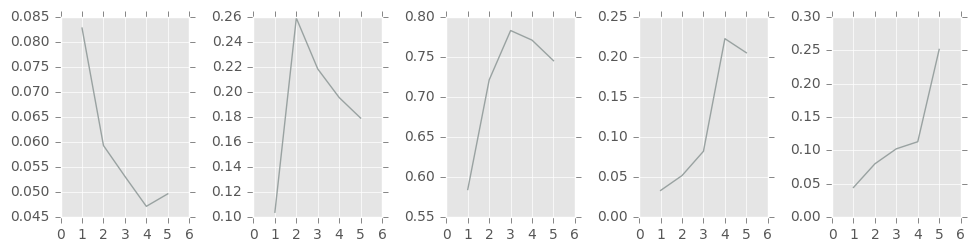

In [117]:
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("ggplot")

x =np.arange(1,6)
plt.figure(figsize=(9, 2)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.plot(x,v[:,i],color='#99a2a1')
    plt.axis([0, 6, plt.axis()[2], plt.axis()[3]])
    
plt.subplots_adjust(wspace=0.5, hspace=0.5, top=1, bottom=0, left=0, right=1)
plt.savefig('response.png')
plt.show()

** Mean activation value of number filed nodes as a function of the distance to eache node's preferred numerosity **
Activation gradually diminish as the distance increase 

- percentage normalize the input responses 
- center plot to preferred numerosity 
- label the distances 


In [107]:
# Percentage normalization 
for i in range(5):
    v[:,i] = v[:,i]/np.max(v[:,i])*100

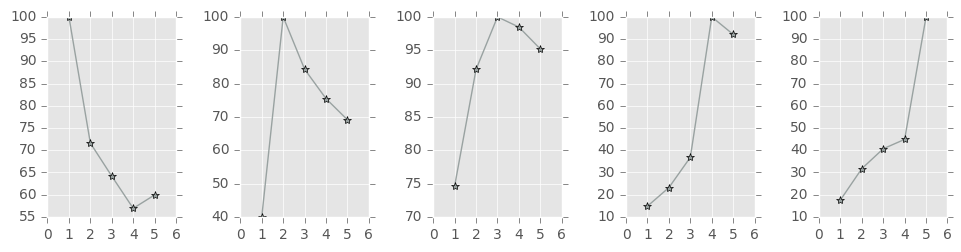

In [108]:
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("ggplot")

x =np.arange(1,6)
plt.figure(figsize=(9, 2)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.plot(x,v[:,i],'*-', color='#99a2a1')
    plt.axis([0, 6, plt.axis()[2], plt.axis()[3]],color='#99a2a1')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5, top=1, bottom=0, left=0, right=1)
plt.savefig('normalized_response.png')
plt.show()

** Bandwidth **
Behaviourally = Numerical distance between sample and test at which the monkey performance reached 75%
Neuronally =  numerical position where the output maximum dropped by 30%/25% 

In [109]:
for i in range(5):
    v[:,i] = v[:,i]>75

In [110]:
v

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.]])

** Positive Skewing ** 

Positive skewing holds (only numerosity 1,2,3 to take into consideration) 
